<a href="https://colab.research.google.com/github/Baseone111/holiday_machine_learning_lessons/blob/main/Cat_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

In [5]:
url = 'https://www.kaggle.com/competitions/dogs-vs-cats/data'

In [6]:
od.download(url)

Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

In [8]:
from zipfile import ZipFile

In [9]:
dataset = '/content/dogs-vs-cats/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('extracted successfuly')


extracted successfuly


In [10]:
path, dirs,files = next(os.walk('/content/train'))
print(len(files))

25000


In [11]:
file_names = os.listdir('/content/train')

In [12]:
file_names[0:5]

['cat.8933.jpg',
 'cat.10577.jpg',
 'dog.2599.jpg',
 'cat.1306.jpg',
 'dog.9153.jpg']

displaying the images

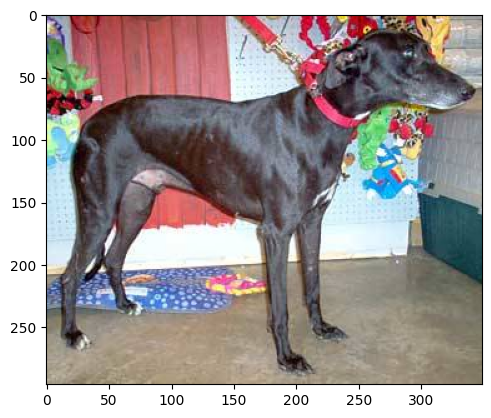

In [13]:
img = mpimg.imread('/content/train/dog.11840.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
print(img.shape)

(296, 349, 3)


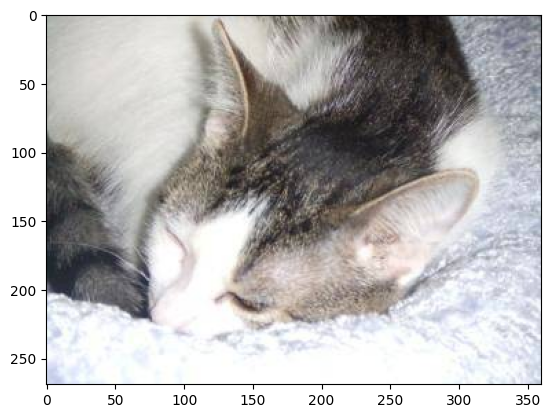

In [15]:
img = mpimg.imread('/content/train/cat.2558.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
dog_count =[]
cat_count = []

file_names = os.listdir('/content/train')

for filename in file_names:
  name = filename[0:3]
  if name == 'dog':
    dog_count.append(filename)
  else:
    cat_count.append(filename)

In [17]:
print(len(dog_count))
print(len(cat_count))

12500
12500


getting out the 2000 images and save them into a new file directory

In [20]:
os.mkdir('/content/reshaped')

In [21]:
train_dataset = '/content/train/'
reshaped_dataset = '/content/reshaped/'


for i in range(3000):
  filename = os.listdir('/content/train')[i]
  img_path = train_dataset + filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')
  new_image = reshaped_dataset + filename
  img.save(new_image)



In [22]:
print(len(os.listdir('/content/reshaped')))

3000


displaying the image

In [23]:
path,dirs,files = next(os.walk('/content/reshaped'))
print(len(files))

3000


In [24]:
file_names = os.listdir('/content/reshaped')
print(file_names[0:5])

['cat.8933.jpg', 'cat.10577.jpg', 'dog.2599.jpg', 'cat.1306.jpg', 'dog.9153.jpg']


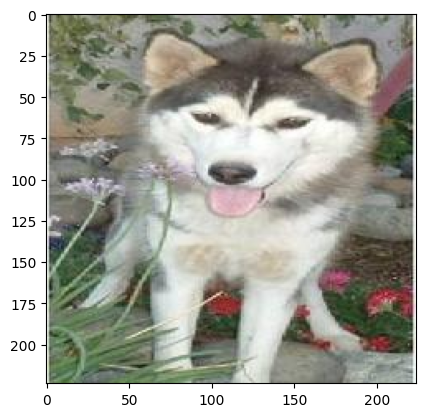

In [26]:
img = mpimg.imread('/content/reshaped/dog.2599.jpg')
imgplot = plt.imshow(img)
plt.show()

In [27]:
dog_count = 0
cat_count = 0

file_names = os.listdir('/content/reshaped')

for filename in file_names:
  name = filename[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

In [28]:
print((dog_count))
print((cat_count))

1512
1488


assigning labels to the images

cat --> 0

dog --> 1

In [32]:
file_names = os.listdir('/content/reshaped')
labels = []

for i in range(3000):
  filename = file_names[i]

  label = filename[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [33]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1488 1512]


In [34]:
print(len(labels))
print(labels[0:5])
print(file_names[0:5])

3000
[0, 0, 1, 0, 1]
['cat.8933.jpg', 'cat.10577.jpg', 'dog.2599.jpg', 'cat.1306.jpg', 'dog.9153.jpg']


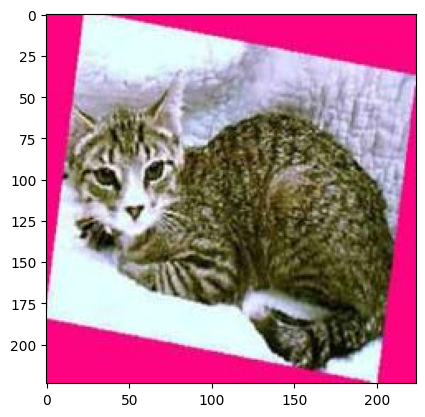

In [38]:
img = mpimg.imread('/content/reshaped/cat.1306.jpg')
imgplot = plt.imshow(img)
plt.show()

In [39]:
import cv2
import glob

In [40]:
image_directory = '/content/reshaped/'

In [41]:
files = []

file_extension = ['jpg', 'png']

[files.extend(glob.glob(image_directory + '*.' + e) )for e in file_extension]
new_data_image = np.asarray([cv2.imread(file) for file in files])

In [42]:
print(new_data_image.shape)

(3000, 224, 224, 3)


In [43]:
type(new_data_image)

numpy.ndarray

In [44]:
print(new_data_image[0])

[[[  5   4   6]
  [  8   7   9]
  [  9  11  12]
  ...
  [ 26  32  27]
  [ 21  28  21]
  [ 22  31  21]]

 [[  7   6   8]
  [ 12  11  13]
  [ 14  16  17]
  ...
  [ 25  31  26]
  [ 21  28  21]
  [ 21  30  20]]

 [[  9   8  10]
  [ 15  14  16]
  [ 17  19  20]
  ...
  [ 24  30  25]
  [ 19  26  19]
  [ 20  29  19]]

 ...

 [[167 163 162]
  [169 165 164]
  [170 166 165]
  ...
  [180 181 179]
  [176 177 175]
  [167 168 166]]

 [[171 166 165]
  [169 164 163]
  [167 162 161]
  ...
  [181 182 180]
  [178 179 177]
  [175 176 174]]

 [[169 164 163]
  [165 160 159]
  [162 157 156]
  ...
  [182 183 181]
  [182 183 181]
  [185 186 184]]]


In [45]:
x = new_data_image
y = np.asarray(labels)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [49]:
import tensorflow as tf
from tensorflow import keras



In [50]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Input layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),  # Flatten the features
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Reduce overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,722 (49.36 MB)

 Trainable params: 12,939,722 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(x_train_scaled, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.4603 - loss: 1.2333 - val_accuracy: 0.4917 - val_loss: 0.7160
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5299 - loss: 0.7188 - val_accuracy: 0.5375 - val_loss: 0.6858
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5912 - loss: 0.6741 - val_accuracy: 0.6500 - val_loss: 0.6331
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6441 - loss: 0.6275 - val_accuracy: 0.6833 - val_loss: 0.5849
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7254 - loss: 0.5521 - val_accuracy: 0.6792 - val_loss: 0.5613
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7591 - loss: 0.4836 - val_accuracy: 0.7000 - val_loss: 0.6249
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7973 - loss: 0.4232 - val_accuracy: 0.7000 - val_loss: 0.6051
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8427 - loss: 0.3681 - val_accuracy: 0.6625 -

In [52]:
import seaborn as sns


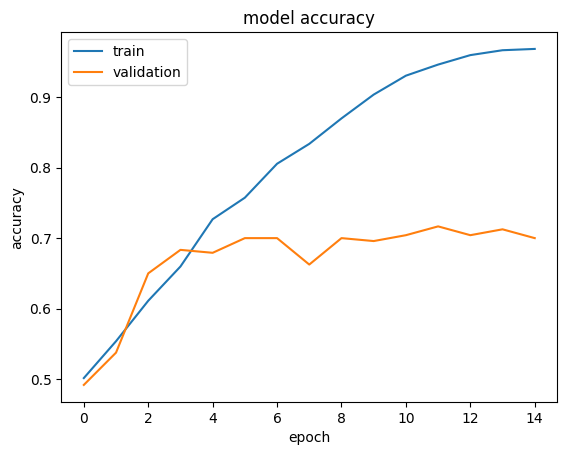

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [54]:
y_pred = model.predict(x_test_scaled)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


In [55]:
print(y_pred[0])

[9.9999082e-01 9.1954971e-06 4.8406179e-18 2.5474272e-22 6.5477725e-17
 4.0580144e-16 6.1847560e-17 5.0379989e-18 2.2358715e-18 2.9449694e-17]


In [56]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(x_test_scaled, y_pred)

ValueError: Classification metrics can't handle a mix of unknown and continuous-multioutput targets